# Requirements

In [ ]:
!pip install -r "drive/My Drive/Colab Notebooks/Practicas grafica/requirements.txt"

# Workspace to load and save images

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/Practicas grafica/'
src_path = path + 'src_images/'
dst_path = path + 'out_images/'

# Code..

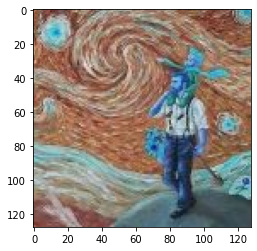

In [9]:
import cv2
from matplotlib import pyplot as plt
import math as mt
import numpy as np

img = cv2.imread(src_path+'vangogh.jpg')
plt.imshow(img)

True

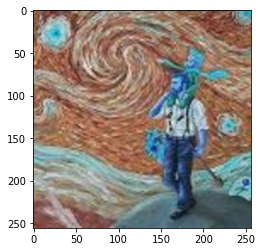

In [ ]:
scale_percent = 200 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height) 
img_zoom = cv2.resize(img,dim,interpolation = cv2.INTER_CUBIC)
plt.imshow(img_zoom)
cv2.imwrite(dst_path+'zoom.jpg',img_zoom) #write on folder

True

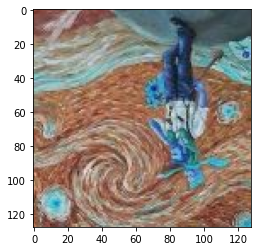

In [57]:
flip_img = cv2.flip(img,0) #1, 0, 1, -1 coordinates
plt.imshow(flip_img)
cv2.imwrite(dst_path+'flip.jpg',flip_img) #write on folder

True

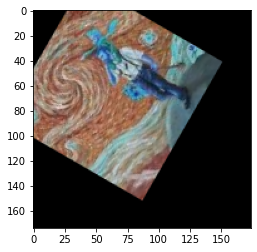

In [7]:
def rotate(src,angle,scale=1,center=(0,0)):
  height = src.shape[0]
  width = src.shape[1]
  sa = mt.sin(angle*mt.pi/180)
  ca = mt.cos(angle*mt.pi/180)
  cx = (-width/2*ca)-(height/2*sa)
  cy = (-width/2*sa)-(height/2*ca)
  dx = int((width*ca)+(height*sa)*scale)
  dy = int((height*ca)+(width*sa)*scale)
  M = cv2.getRotationMatrix2D(center,angle,scale)
  dst = cv2.warpAffine(src,M,(dx,dy))
  return dst
rotate_img = rotate(img,60,1,(64,64))
plt.imshow(rotate_img)
cv2.imwrite(dst_path+'rotate.jpg',rotate_img) #write on folder


True

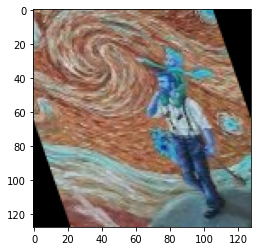

In [51]:
def shear(img,angle):
  inc = angle*mt.pi/180.0
  w = img.shape[1]
  h = img.shape[0]
  c = np.float32([[1, 0, 0], [0, 1, 0]])
  c[0,2] = -inc*h/2.0
  c[0,1] = inc
  dst = cv2.warpAffine(img, c, (h,w))
  return dst
shear_img = shear(img,20)
plt.imshow(shear_img)
cv2.imwrite(dst_path+'shear.jpg',rotate_img) #write on folder


True

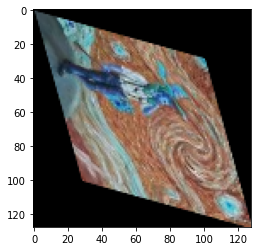

In [42]:
#Affin transformation
pt1 = np.float32([[0,0],[128,0],[128,128]])
pt2 = np.float32([[128,128],[100,28],[0,0]])
c = cv2.getAffineTransform(pt1,pt2)
h = img.shape[0]
w = img.shape[1]
affin_img = cv2.warpAffine(img,c,(h,w))
plt.imshow(affin_img)
cv2.imwrite(dst_path+'affin_transformation.jpg',rotate_img) #write on folder